In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [60]:
_ = load_iris()
df = pd.DataFrame(data=_.data, columns=_.feature_names)
target = _.target
target_names = _.target_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=True)
df_2d = pd.DataFrame(data=tsne.fit_transform(df), columns=['x', 'y'])
df_2d.head()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.511967
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.484270
[t-SNE] Error after 400 iterations: 1.484270


,x,y
0,25.239074,33.690988
1,50.147922,39.276942
2,58.460718,38.965236
3,60.619339,31.356475
4,4.823736,45.929971


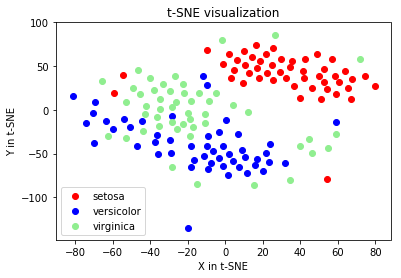

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
color_map = {0:'red', 1:'blue', 2:'lightgreen'}
plt.figure()
for idx, cl in enumerate(np.unique(target)):
    plt.scatter(data=df_2d[target==cl], x='x', y='y', c=color_map[idx], label=target_names[cl])
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='lower left')
plt.title('t-SNE visualization')
plt.show()

In [95]:
np.array([1,2,3,4,5,6]) ** 2

array([ 1,  4,  9, 16, 25, 36])